In [123]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
import pandas as pd
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

In [125]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [126]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [127]:
DF['datetime'] = DF.datetime.apply(pd.to_datetime)
DF['year'] = DF.datetime.apply(lambda x : x.year)
DF['month'] = DF.datetime.apply(lambda x : x.month)
DF['day'] = DF.datetime.apply(lambda x : x.day)
DF['hour'] = DF.datetime.apply(lambda x: x.hour)


In [128]:
drop_columns = ['datetime', 'casual', 'registered']
DF.drop(drop_columns, axis = 1,inplace = True)

# year, month, day, hour 분리 후, datetime, casual, registered 열 삭제

In [129]:
DF = DF[['temp', 'atemp', 'humidity' ,'count', 'season', 'holiday', 'workingday', 'weather', 'month', 'hour']]
DF.head()

,temp,atemp,humidity,count,season,holiday,workingday,weather,month,hour
0,9.84,14.395,81,16,1,0,0,1,1,0
1,9.02,13.635,80,40,1,0,0,1,1,1
2,9.02,13.635,80,32,1,0,0,1,1,2
3,9.84,14.395,75,13,1,0,0,1,1,3
4,9.84,14.395,75,1,1,0,0,1,1,4


In [130]:
DF.describe()

,temp,atemp,humidity,count,season,holiday,workingday,weather,month,hour
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,191.574132,2.506614,0.028569,0.680875,1.418427,6.521495,11.541613
std,7.79159,8.474601,19.245033,181.144454,1.116174,0.166599,0.466159,0.633839,3.444373,6.915838
min,0.82000,0.760000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,42.000000,2.000000,0.000000,0.000000,1.000000,4.000000,6.000000
50%,20.50000,24.240000,62.000000,145.000000,3.000000,0.000000,1.000000,1.000000,7.000000,12.000000
75%,26.24000,31.060000,77.000000,284.000000,4.000000,0.000000,1.000000,2.000000,10.000000,18.000000
max,41.00000,45.455000,100.000000,977.000000,4.000000,1.000000,1.000000,4.000000,12.000000,23.000000


# 탐색적 데이터 분석 EDA
  * Count 변수 그래프
  * PairPlot
  * Correlation
  * Scatter
  * Boxplot
  * Feature_Importance
    * Decision Tree feature_Importance
    * GBM feature_Importance

> count 변수 시각화

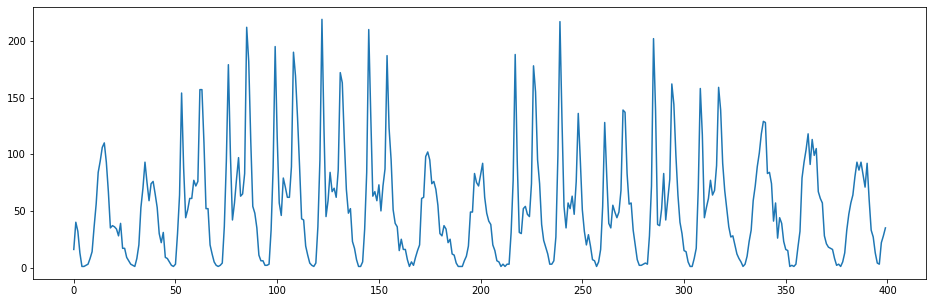

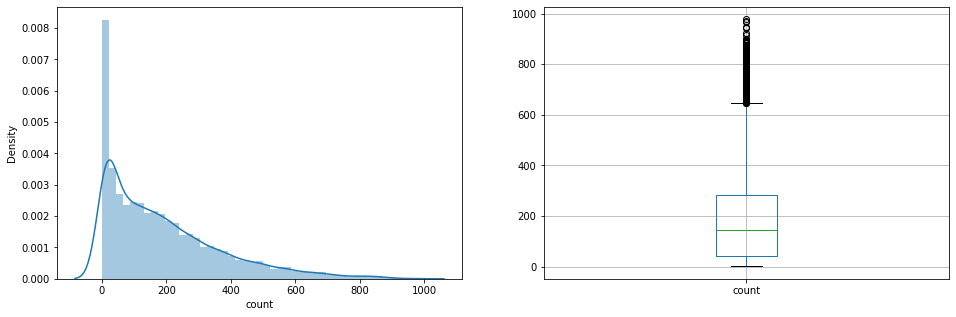

In [131]:
# count 그래프 (400개 데이터만)
plt.figure(figsize = (16,5))
plt.plot(DF['count'][:400])
plt.show()

# count 분포도 / boxplot
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(DF['count'], ax = ax[0])
DF.boxplot('count', ax = ax[1])
plt.show()

> pairplot

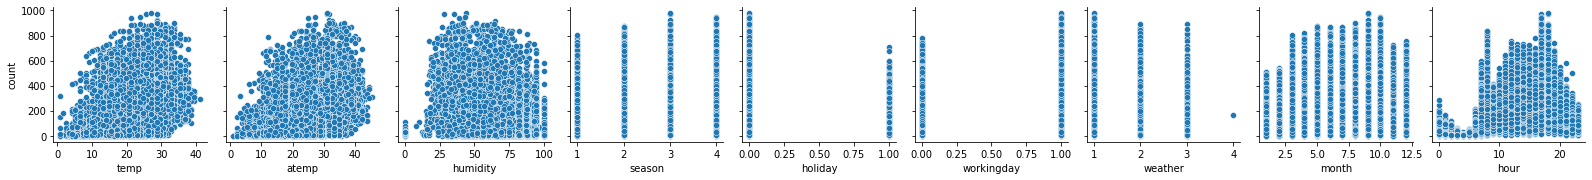

In [163]:
sns.pairplot(DF, y_vars=['count'],
             x_vars = ['temp', 'atemp', 'humidity' , 'season', 'holiday', 'workingday', 'weather', 'month', 'hour'])
plt.show()

# Train & Test Split

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = DF[['temp', 'atemp', 'humidity', 'season', 'holiday', 'workingday', 'weather', 'month', 'hour']]
y = DF['count']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

In [135]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7620, 9) (7620,)
Test Data :  (3266, 9) (3266,)


# Feature Importance

> # Gradient Boosting Machine Classifier 사용

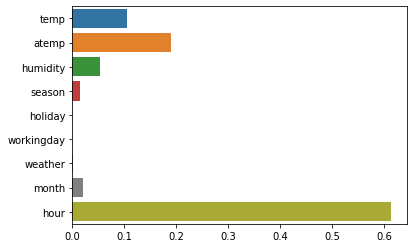

CPU times: user 8.34 s, sys: 17 ms, total: 8.35 s
Wall time: 8.9 s


In [136]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(loss = 'ls',
                                n_estimators = 6000,
                                learning_rate = 0.0001,
                                criterion = 'mse',
                                max_features = 3,
                                max_depth = 1)

GBR.fit(X_train, y_train)

sns.barplot(GBR.feature_importances_, DF.columns.drop(['count']))
plt.show()

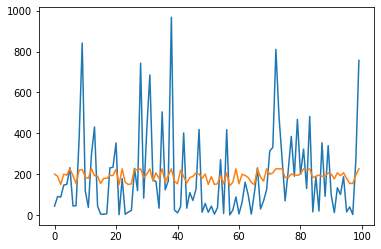

In [140]:
plt.plot( range(len(y_test))[:100] , y_test[:100] )
plt.plot( range(len(y_test))[:100] , GBR.predict(X_test)[:100] )
plt.show()

> # Random Forest Regression 사용

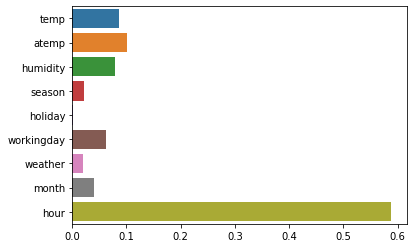

CPU times: user 22.5 s, sys: 769 ms, total: 23.3 s
Wall time: 13.7 s


In [137]:
# Random Forest Regression feature_importance 

%%time
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 2000 , 
                            max_features = 4, 
                            max_depth = 10 , 
                            criterion = 'mse' , 
                            n_jobs = -1 , 
                            random_state = 2045)
RFR.fit(X_train , y_train)

sns.barplot(RFR.feature_importances_, DF.columns.drop(['count']) )
plt.show()

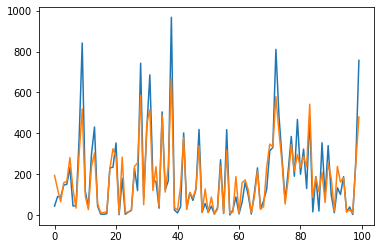

In [141]:
plt.plot( range(len(y_test))[:100] , y_test[:100] )
plt.plot( range(len(y_test))[:100] , RFR.predict(X_test)[:100] )
plt.show()

> # Descision Tree Regressor 사용

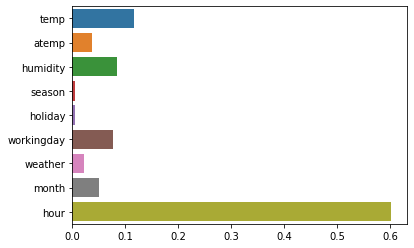

CPU times: user 198 ms, sys: 5.02 ms, total: 203 ms
Wall time: 205 ms


In [164]:
# Descision Tree Regressor feature_importance 

%%time
from sklearn.tree import DecisionTreeRegressor 
DTR = DecisionTreeRegressor(max_depth = None,
                            criterion = 'mse')
DTR.fit(X_train , y_train)

sns.barplot(DTR.feature_importances_, DF.columns.drop(['count']) )
plt.show()

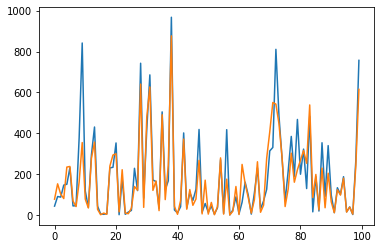

In [165]:
plt.plot( range(len(y_test))[:100] , y_test[:100] )
plt.plot( range(len(y_test))[:100] , DTR.predict(X_test)[:100] )
plt.show()

# Modeling

In [190]:
mse_sqrt = {}

In [191]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold

> ## 1. Multivariate Regression

In [193]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression(n_jobs = -1)

MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [194]:
mse = np.sqrt(mean_squared_error(y_test, MR.predict(X_test)))
mse_sqrt['Multi Regression'] = mse
mse_sqrt

{'Multi Regression': 148.07214204878113}

> ## 2. Ridge Regression

In [198]:
from sklearn.linear_model import Ridge

RG = Ridge(solver = 'cholesky')

In [199]:
params = {'alpha' : np.linspace(0, 1, 1000)}

In [200]:
grid_cv = GridSearchCV(RG,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = KFold(n_splits = 5),
                       refit = True,
                       n_jobs = -1)

In [201]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='cholesky', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.008008...
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [202]:
mse = np.sqrt(mean_squared_error(y_test, grid_cv.best_estimator_.predict(X_test)))
mse_sqrt['Ridge Regression'] = mse
mse_sqrt

{'Multi Regression': 148.07214204878113,
 'Ridge Regression': 148.07194962436154}

> # 3. Lasso Regression

In [203]:
from sklearn.linear_model import Lasso

LS = Lasso()

In [204]:
params = {'alpha' : np.linspace(0, 1, 1000)}

In [205]:
grid_cv = GridSearchCV(LS,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = KFold(n_splits = 5),
                       refit = True,
                       n_jobs = -1)

In [206]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.001001  , 0.002002  , 0.003003...
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [207]:
mse = np.sqrt(mean_squared_error(y_test, grid_cv.best_estimator_.predict(X_test)))
mse_sqrt['Lasso Regression'] = mse
mse_sqrt

{'Lasso Regression': 148.04758052841476,
 'Multi Regression': 148.07214204878113,
 'Ridge Regression': 148.07194962436154}

> ## 4) Decision Tree Regressor

In [208]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(criterion = 'mse')

In [209]:
params = {'max_depth' : [5, 10, 15]}

In [210]:
grid_cv = GridSearchCV(DTR,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = KFold(n_splits = 5),
                       refit = True,
                       n_jobs = -1)

In [211]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1, param_grid={'max_depth': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, retur

In [212]:
mse = np.sqrt(mean_squared_error(y_test, grid_cv.best_estimator_.predict(X_test)))
mse_sqrt['Decision Tree Regression'] = mse
mse_sqrt

{'Decision Tree Regression': 81.39628762797271,
 'Lasso Regression': 148.04758052841476,
 'Multi Regression': 148.07214204878113,
 'Ridge Regression': 148.07194962436154}

> ## 5) Random Forest Regressor

In [216]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

In [ ]:
params = {'n_estimators' : [500, 1000, 1500, 2000],
          'max_features' : [2, 4, 6],
          'max_depth' : [5, 10, 15]}
          

In [217]:
grid_cv = GridSearchCV(RFR,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = KFold(n_splits = 5),
                       refit = True,
                       n_jobs = -1)

In [218]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             ve

In [219]:
mse = np.sqrt(mean_squared_error(y_test, grid_cv.best_estimator_.predict(X_test)))
mse_sqrt['Random Forest Regression'] = mse
mse_sqrt

{'Decision Tree Regression': 81.39628762797271,
 'Lasso Regression': 148.04758052841476,
 'Multi Regression': 148.07214204878113,
 'Random Forest Regression': 68.59759094016596,
 'Ridge Regression': 148.07194962436154}

# MSE 비교

In [220]:
mse_sqrt

{'Decision Tree Regression': 81.39628762797271,
 'Lasso Regression': 148.04758052841476,
 'Multi Regression': 148.07214204878113,
 'Random Forest Regression': 68.59759094016596,
 'Ridge Regression': 148.07194962436154}

In [221]:
mse_sqrt_sorted = dict(sorted(mse_sqrt.items(), key = lambda x:x[1]))

mse_sqrt_sorted

{'Decision Tree Regression': 81.39628762797271,
 'Lasso Regression': 148.04758052841476,
 'Multi Regression': 148.07214204878113,
 'Random Forest Regression': 68.59759094016596,
 'Ridge Regression': 148.07194962436154}

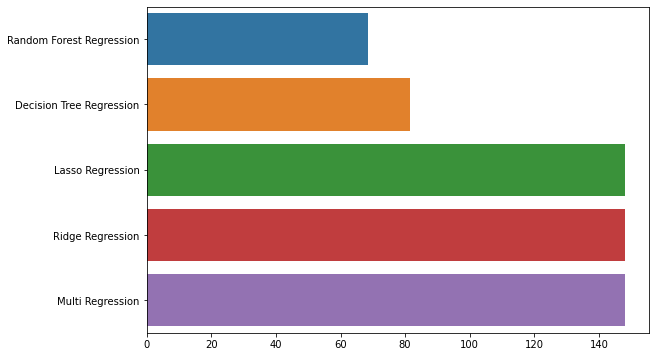

In [222]:
plt.figure(figsize = (9, 6))
sns.barplot(list(mse_sqrt_sorted.values()), list(mse_sqrt_sorted.keys()))
plt.show()